In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

In [5]:
np.random.seed(101)
tf.set_random_seed(101)

In [6]:
rand_a = np.random.uniform(0, 100, (5, 5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [7]:
rand_b = np.random.uniform(0, 100, (5, 1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [17]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [18]:
add = a + b

In [19]:
mul = a*b

In [26]:
with tf.Session() as sess:
    add_result = sess.run(add,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    print("\n")
    
    mult = sess.run(mul, feed_dict={a:rand_a, b:rand_b})
    print(mult)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


                       NEURAL NETWORK
                            _||_
                            \  /
                             \/

In [27]:
n_f = 10
n_d_n = 3

In [28]:
x = tf.placeholder(tf.float32, (None, n_f))

In [29]:
b = tf.Variable(tf.zeros([n_d_n]))

w = tf.Variable(tf.random_normal([n_f, n_d_n]))

In [30]:
# y = mx + c
xw = tf.matmul(x, w)

In [31]:
z = tf.add(xw, b)

In [33]:
# Activation Function
a = tf.sigmoid(z)

In [ ]:
# Variable init
init = tf.global_variables_initializer()

In [36]:
with tf.Session() as ses:
    ses.run(init)
    
    layer_out = ses.run(a, feed_dict={x : np.random.random([1, n_f])})

In [42]:
print(layer_out)

[[0.29928538 0.00154589 0.9659778 ]]


                     SIMPLE REGRESSION
                            _||_
                            \  /
                             \/

In [51]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)

x_data

array([-0.89943625,  1.74890053,  3.25814891,  2.93927296,  4.2553848 ,
        5.12534855,  5.88587889,  8.2379122 ,  8.56020649, 10.47334905])

In [52]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [53]:
import matplotlib.pyplot as plt

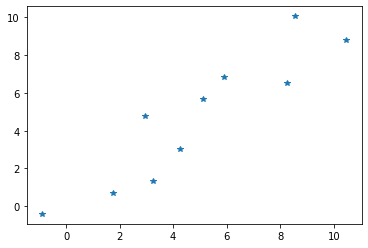

In [96]:
plt.plot(x_data, y_label, '*')

y = mx + b

In [97]:
np.random.rand(2)

array([0.62577345, 0.10084962])

In [98]:
m = tf.Variable(0.98)

b = tf.Variable(0.85) 

In [100]:
# Cost function

error = 0

for x, y in zip(x_data, y_label):
    
    y_hat = m*x + b
    
    error += (y-y_hat)**2

In [101]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [102]:
init = tf.global_variables_initializer()

In [119]:
with tf.Session() as sess:
    sess.run(init)
    
    epochs = 10
    
    for i in range(epochs):
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m, b])

In [120]:
final_slope

0.83625096

In [121]:
final_intercept

0.7873554

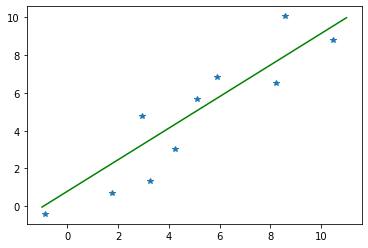

In [122]:
x_test = np.linspace(-1, 11, 10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test, y_pred_plot, 'g')

plt.plot(x_data, y_label, '*')